In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sys
from tqdm import tqdm
import IPython
import math
import pickle
import random
from datetime import datetime

In [2]:
pip install keras.utils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=f6f663332bb0e2e74ca09b30e02f8c89dc5b69fe13b73903d5eead0c54bb409f
  Stored in directory: c:\users\meltem\appdata\local\pip\cache\wheels\fd\b9\6e\25d4c3a3c0319873aeeab6592c5b4bb9e2af0fec21a0b5188c
Successfully built keras.utils
Note: you may need to restart the kernel to use updated packages.


In [3]:
from keras import backend as keras_backend
from keras.models import Sequential, load_model
from keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
import os
import librosa
import librosa.display
import glob 
import skimage

In [5]:
df = pd.read_csv("C:/Users/Meltem/Desktop/Urban-Sound-Classification-using-CNN-main/Urban-Sound-Classification-using-CNN-main/metadata/UrbanSound8K.csv")
df.shape

(8732, 8)

In [6]:
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [8]:
df["fold"].value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

In [9]:
appended = []
for i in range(1,11):
    appended.append(df[df.fold == i]['class'].value_counts())
    
class_distribution = pd.DataFrame(appended)
class_distribution = class_distribution.reset_index()
class_distribution['index'] = ["fold"+str(x) for x in range(1,11)]
class_distribution

,index,jackhammer,dog_bark,children_playing,street_music,air_conditioner,drilling,engine_idling,siren,car_horn,gun_shot
0,fold1,120,100,100,100,100,100,96,86,36,35
1,fold2,120,100,100,100,100,100,100,91,42,35
2,fold3,120,100,100,100,100,100,107,119,43,36
3,fold4,120,100,100,100,100,100,107,166,59,38
4,fold5,120,100,100,100,100,100,107,71,98,40
5,fold6,68,100,100,100,100,100,107,74,28,46
6,fold7,76,100,100,100,100,100,106,77,28,51
7,fold8,78,100,100,100,100,100,88,80,30,30
8,fold9,82,100,100,100,100,100,89,82,32,31
9,fold10,96,100,100,100,100,100,93,83,33,32


In [10]:
df['class'].value_counts(normalize=True)

dog_bark            0.114521
children_playing    0.114521
air_conditioner     0.114521
street_music        0.114521
engine_idling       0.114521
jackhammer          0.114521
drilling            0.114521
siren               0.106390
car_horn            0.049130
gun_shot            0.042831
Name: class, dtype: float64

C:\Users\Meltem\AppData\Local\Temp/ipykernel_45872/3902983155.py:7: FutureWarning: Pass y=[-0.00341243 -0.00506065 -0.00463294 ... -0.00247565 -0.00155365
 -0.00035246], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)


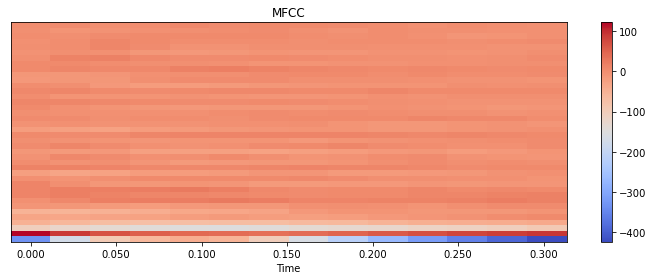

In [13]:
import os
import IPython.display as ipd
ipd.Audio('C:/Users/Meltem/Desktop/Urban-Sound-Classification-using-CNN-main/Urban-Sound-Classification-using-CNN-main/audio/fold9/101729-0-0-18.wav')

#MFCC 
y,sr=librosa.load("C:/Users/Meltem/Desktop/Urban-Sound-Classification-using-CNN-main/Urban-Sound-Classification-using-CNN-main/audio/fold5/100032-3-0-0.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

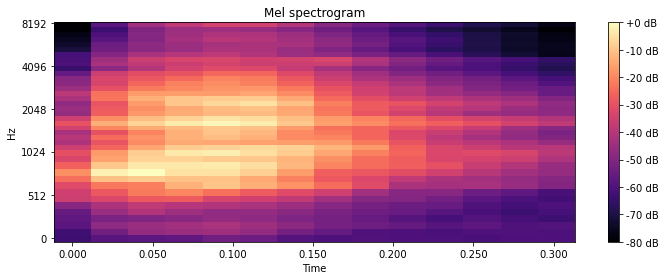

In [14]:
#Melspectrogram
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

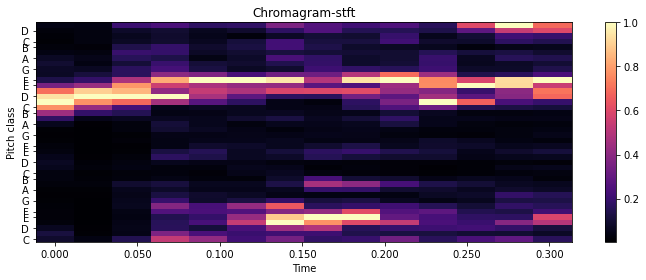

In [15]:
# Chroma_stft
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40)
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram-stft')
plt.tight_layout()

In [16]:
y,sr=librosa.load("C:/Users/Meltem/Desktop/Urban-Sound-Classification-using-CNN-main/Urban-Sound-Classification-using-CNN-main/audio/fold5/100032-3-0-0.wav")
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
# tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sr).T,axis=0)
# melspectrogram.shape,chroma_stft.shape,contrast.shape,tonnetz.shape,mfccs.shape
mfccs.shape,melspectrogram.shape,chroma_stft.shape

C:\Users\Meltem\AppData\Local\Temp/ipykernel_45872/3240033186.py:2: FutureWarning: Pass y=[-0.00341243 -0.00506065 -0.00463294 ... -0.00247565 -0.00155365
 -0.00035246], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)


((40,), (40,), (40,))

In [17]:
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft)),(40,3))
features.shape

(40, 3)

In [19]:
x_train=[]
x_test=[]
y_train=[]
y_test=[]

path="C:/Users/Meltem/Desktop/Urban-Sound-Classification-using-CNN-main/Urban-Sound-Classification-using-CNN-main/audio/fold"
for i in tqdm(range(len(df))):
    fold_no=str(df.iloc[i]["fold"])
    file=df.iloc[i]["slice_file_name"]
    label=df.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    y,sr=librosa.load(filename)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft)),(40,3))
    if(fold_no!='10'):
      x_train.append(features)
      y_train.append(label)
    else:
      x_test.append(features)
      y_test.append(label)

 41%|███████████████████████████████▊                                              | 3555/8732 [04:38<07:12, 11.98it/s]C:\Users\Meltem\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
 95%|██████████████████████████████████████████████████████████████████████████▎   | 8324/8732 [10:30<00:21, 18.88it/s]C:\Users\Meltem\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\Meltem\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
100%|██████████████████████████████████████████████████████████████████████████████| 8732/8732 [10:58<00:00, 13.27it/s]


In [20]:
len(x_train)+len(x_test)

8732

In [22]:
x=x_train+x_test
y=y_train+y_test

x=np.array(x)
y=np.array(y)
x.shape,y.shape

((8732, 40, 3), (8732,))

In [23]:
x_2d=np.reshape(x,(x.shape[0],x.shape[1]*x.shape[2]))
x_2d.shape

np.savetxt("x.csv", x_2d, delimiter=",")
np.savetxt("y.csv",y,delimiter=",")
x_2d.shape

(8732, 120)

In [24]:
ndexes = []
total = len(df)
indexes = list(range(0, total))


random.shuffle(indexes)

test_split_pct = 20
split_offset = math.floor(test_split_pct * total / 100)

test_split_idx = indexes[0:split_offset]
train_split_idx = indexes[split_offset:total]


X_test = np.take(x, test_split_idx, axis=0)
y_test = np.take(y, test_split_idx, axis=0)
X_train = np.take(x, train_split_idx, axis=0)
y_train = np.take(y, train_split_idx, axis=0)

test = df.iloc[test_split_idx]
train = df.iloc[train_split_idx]

print("Test split: {} \t\t Train split: {}".format(len(test), len(train)))
print("X test shape: {} \t X train shape: {}".format(X_test.shape, X_train.shape))
print("y test shape: {} \t\t y train shape: {}".format(y_test.shape, y_train.shape))

Test split: 1746 		 Train split: 6986
X test shape: (1746, 40, 3) 	 X train shape: (6986, 40, 3)
y test shape: (1746,) 		 y train shape: (6986,)


In [25]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_train.shape,y_test.shape

((6986, 10), (1746, 10))

In [26]:
X_train=np.reshape(X_train,(X_train.shape[0], 40,3))
X_test=np.reshape(X_test,(X_test.shape[0], 40,3))
X_train.shape,X_test.shape

((6986, 40, 3), (1746, 40, 3))

In [27]:
X_train=np.reshape(X_train,(X_train.shape[0], 40,3,1))
X_test=np.reshape(X_test,(X_test.shape[0], 40,3,1))
X_train.shape,X_test.shape

((6986, 40, 3, 1), (1746, 40, 3, 1))

In [28]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

model=Sequential()
model.add(Conv2D(64,kernel_size=3,strides=1,padding="Same",activation="relu",input_shape=(40,3,1)))
model.add(MaxPooling2D(padding="same"))
model.add(Conv2D(128,kernel_size=3,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax"))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

history_relu=model.fit(X_train,y_train,batch_size=36,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
195/195 [==============================] - 3s 11ms/step - loss: 2.2807 - accuracy: 0.1816 - val_loss: 2.1041 - val_accuracy: 0.1896
Epoch 2/100
195/195 [==============================] - 3s 13ms/step - loss: 1.9974 - accuracy: 0.2957 - val_loss: 1.7655 - val_accuracy: 0.3763
Epoch 3/100
195/195 [==============================] - 3s 14ms/step - loss: 1.7801 - accuracy: 0.3709 - val_loss: 1.7417 - val_accuracy: 0.3981
Epoch 4/100
195/195 [==============================] - 2s 10ms/step - loss: 1.7125 - accuracy: 0.3934 - val_loss: 1.5667 - val_accuracy: 0.4542
Epoch 5/100
195/195 [==============================] - 2s 10ms/step - loss: 1.6315 - accuracy: 0.4290 - val_loss: 1.5321 - val_accuracy: 0.4605
Epoch 6/100
195/195 [==============================] - 3s 13ms/step - loss: 1.5389 - accuracy: 0.4539 - val_loss: 1.5452 - val_accuracy: 0.4530
Epoch 7/100
195/195 [==============================] - 2s 11ms/step - loss: 1.5004 - accuracy: 0.4701 - val_loss: 1.4017 - val_accuracy:

195/195 [==============================] - 2s 12ms/step - loss: 0.6583 - accuracy: 0.7720 - val_loss: 0.7629 - val_accuracy: 0.7692
Epoch 58/100
195/195 [==============================] - 3s 14ms/step - loss: 0.6443 - accuracy: 0.7813 - val_loss: 0.7819 - val_accuracy: 0.7692
Epoch 59/100
195/195 [==============================] - 3s 13ms/step - loss: 0.6527 - accuracy: 0.7781 - val_loss: 0.7584 - val_accuracy: 0.7646
Epoch 60/100
195/195 [==============================] - 2s 12ms/step - loss: 0.6329 - accuracy: 0.7831 - val_loss: 0.7400 - val_accuracy: 0.7675
Epoch 61/100
195/195 [==============================] - 3s 13ms/step - loss: 0.6347 - accuracy: 0.7800 - val_loss: 0.7379 - val_accuracy: 0.7772
Epoch 62/100
195/195 [==============================] - 3s 17ms/step - loss: 0.6414 - accuracy: 0.7794 - val_loss: 0.7110 - val_accuracy: 0.7772
Epoch 63/100
195/195 [==============================] - 3s 13ms/step - loss: 0.6840 - accuracy: 0.7675 - val_loss: 0.7359 - val_accuracy: 0.780

In [29]:
train_loss_score=model.evaluate(X_train,y_train)
test_loss_score=model.evaluate(X_test,y_test)
print(train_loss_score)
print(test_loss_score)

55/55 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.8081
[0.27594876289367676, 0.9101059436798096]
[0.6837266683578491, 0.8081328868865967]


In [30]:
y_probs = model.predict(X_test)

yhat_probs = np.argmax(y_probs, axis=1)
y_trues = np.argmax(y_test, axis=1)

test['pred'] = yhat_probs

C:\Users\Meltem\AppData\Local\Temp/ipykernel_45872/1832282416.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = yhat_probs


In [31]:
np.set_printoptions(precision=2)

cm = confusion_matrix(y_trues, yhat_probs)
print(cm) 

[[184   0   3   0   3   4   1   2   4   4]
 [  1  71   4   1   0   1   0   0   2  11]
 [  4   1 137  11   2  12   5   7  13  19]
 [  1   0  24 134   5   3   0   0  17  11]
 [  4   1   5   3 181   0   1  10   1  12]
 [  3   1   4   1   0 182   0   0   4   2]
 [  4   0   8   0   5   0  63   2   1   2]
 [  0   0   0   0   6   0   0 171   3   1]
 [  1   1   8   8   0   0   0   1 161   3]
 [  9   1  11  10   5   3   0   6   8 127]]


In [32]:
labels = [
        'Air Conditioner',
        'Car Horn',
        'Children Playing',
        'Dog bark',
        'Drilling',
        'Engine Idling',
        'Gun Shot',
        'Jackhammer',
        'Siren',
        'Street Music'
    ]

re = classification_report(y_trues, yhat_probs, labels=[0,1,2,3,4,5,6,7,8,9], target_names=labels)

print(re)

                  precision    recall  f1-score   support

 Air Conditioner       0.87      0.90      0.88       205
        Car Horn       0.93      0.78      0.85        91
Children Playing       0.67      0.65      0.66       211
        Dog bark       0.80      0.69      0.74       195
        Drilling       0.87      0.83      0.85       218
   Engine Idling       0.89      0.92      0.91       197
        Gun Shot       0.90      0.74      0.81        85
      Jackhammer       0.86      0.94      0.90       181
           Siren       0.75      0.88      0.81       183
    Street Music       0.66      0.71      0.68       180

        accuracy                           0.81      1746
       macro avg       0.82      0.80      0.81      1746
    weighted avg       0.81      0.81      0.81      1746



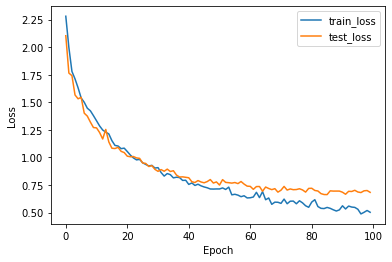

In [33]:
metrics = history_relu.history
plt.plot(history_relu.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['train_loss', 'test_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

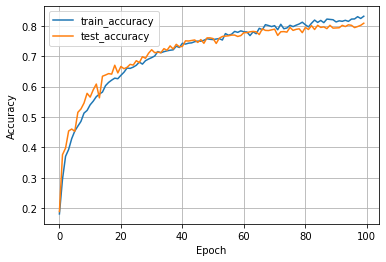

In [34]:
plt.plot(history_relu.history['accuracy'], label='train_accuracy')
plt.plot(history_relu.history['val_accuracy'], label='test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)